In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
org_data=pd.read_csv("/content/heart.csv")
data=org_data.copy()
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [5]:
le_sex=LabelEncoder().fit(data["Sex"])
data["Sex"]=le_sex.transform(data["Sex"])

In [6]:
le_ExerciseAngina=LabelEncoder().fit(data["ExerciseAngina"])
data["ExerciseAngina"]=le_ExerciseAngina.transform(data["ExerciseAngina"])

In [7]:
categorical_data=data[["ChestPainType","RestingECG","ST_Slope"]]
cat_dummies=pd.get_dummies(categorical_data)


In [8]:
data.drop(columns=categorical_data,inplace=True)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0,0.0,0
1,49,0,160,180,0,156,0,1.0,1
2,37,1,130,283,0,98,0,0.0,0
3,48,0,138,214,0,108,1,1.5,1
4,54,1,150,195,0,122,0,0.0,0


In [9]:
new_data=pd.concat([cat_dummies,data],axis=1)
new_data.head()

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,0,1,0,0,0,1,0,0,0,1,40,1,140,289,0,172,0,0.0,0
1,0,0,1,0,0,1,0,0,1,0,49,0,160,180,0,156,0,1.0,1
2,0,1,0,0,0,0,1,0,0,1,37,1,130,283,0,98,0,0.0,0
3,1,0,0,0,0,1,0,0,1,0,48,0,138,214,0,108,1,1.5,1
4,0,0,1,0,0,1,0,0,0,1,54,1,150,195,0,122,0,0.0,0


In [10]:
new_data.to_csv("preprossed data.csv",index=False)

In [11]:
target=new_data.iloc[:,-1].values
features=new_data.iloc[:,:-1].values

In [12]:


xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42,shuffle=True)

In [13]:
scaler=MinMaxScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [14]:
acc_scores=[]
prec_scores=[]
rec_scores=[]
f1_scores=[]

train_size=100*np.arange(1,round(xtrain.shape[0]/100))
train_size=np.append(train_size,xtrain.shape[0])
for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  lr=LogisticRegression().fit(new_xtrain,new_ytrain)

  ypred=lr.predict(xtest)

  acc=accuracy_score(ytest,ypred)

  pres=precision_score(ytest,ypred)
  rec=recall_score(ytest,ypred)
  f1=f1_score(ytest,ypred)

  acc_scores.append(acc)
  prec_scores.append(pres)
  rec_scores.append(rec)
  f1_scores.append(f1)




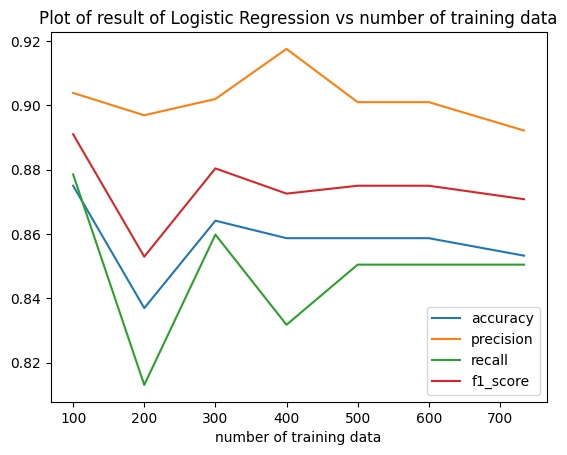

In [15]:
plt.plot(train_size,acc_scores)
plt.plot(train_size,prec_scores)
plt.plot(train_size,rec_scores)
plt.plot(train_size,f1_scores)



plt.title("Plot of result of Logistic Regression vs number of training data")
plt.xlabel("number of training data")
plt.legend(["accuracy","precision","recall","f1_score"])
plt.show()



In [16]:

model = LogisticRegression()



param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga','lbfgs','sag'],
    'fit_intercept': [True, False],  
    'class_weight': [None, 'balanced'], 
    'max_iter': [100, 200, 300]  
}

grid_search = GridSearchCV(model, param_grid, cv=10,verbose=1)
grid_search.fit(xtrain, ytrain)



Fitting 10 folds for each of 576 candidates, totalling 5760 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'sag']},
             verbose=1)

In [17]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

accuracy = best_model.score(xtest, ytest)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8641304347826086


### linear SVM

In [18]:
acc_scores=[]
prec_scores=[]
rec_scores=[]
f1_scores=[]


for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  svm=SVC(kernel="linear").fit(new_xtrain,new_ytrain)

  ypred=svm.predict(xtest)

  acc=accuracy_score(ytest,ypred)

  pres=precision_score(ytest,ypred)
  rec=recall_score(ytest,ypred)
  f1=f1_score(ytest,ypred)

  acc_scores.append(acc)
  prec_scores.append(pres)
  rec_scores.append(rec)
  f1_scores.append(f1)




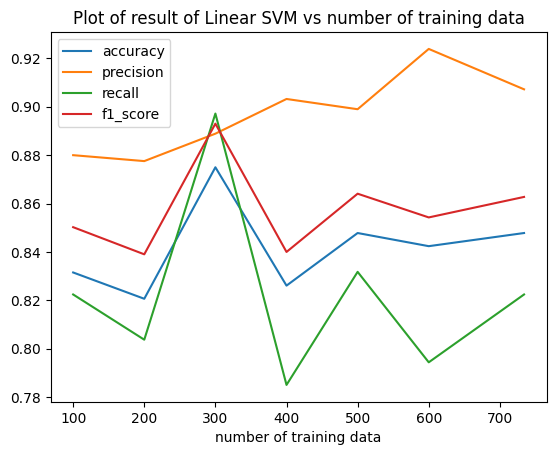

In [19]:
plt.plot(train_size,acc_scores)
plt.plot(train_size,prec_scores)
plt.plot(train_size,rec_scores)
plt.plot(train_size,f1_scores)



plt.title("Plot of result of Linear SVM vs number of training data")
plt.xlabel("number of training data")
plt.legend(["accuracy","precision","recall","f1_score"])
plt.show()


In [20]:
model_svm = SVC(kernel="linear")



param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'degree': [1,2,3],
    'gamma': ['scale', 'auto'],  
    'max_iter': [100, 200, 300]  
}

grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=10,verbose=2)
grid_search_svm.fit(xtrain, ytrain)



Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=sca

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-


[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'max_iter': [100, 200, 300]},
             verbose=2)

In [21]:
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

accuracy_svm = best_model_svm.score(xtest, ytest)

print("Best Hyperparameters:", best_params_svm)
print("Accuracy:", accuracy_svm)


Best Hyperparameters: {'C': 1, 'degree': 1, 'gamma': 'scale', 'max_iter': 300}
Accuracy: 0.8586956521739131


### nonlinear SVM

In [22]:
acc_scores=[]
prec_scores=[]
rec_scores=[]
f1_scores=[]


for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  svm=SVC(kernel="rbf").fit(new_xtrain,new_ytrain)

  ypred=svm.predict(xtest)

  acc=accuracy_score(ytest,ypred)

  pres=precision_score(ytest,ypred)
  rec=recall_score(ytest,ypred)
  f1=f1_score(ytest,ypred)

  acc_scores.append(acc)
  prec_scores.append(pres)
  rec_scores.append(rec)
  f1_scores.append(f1)




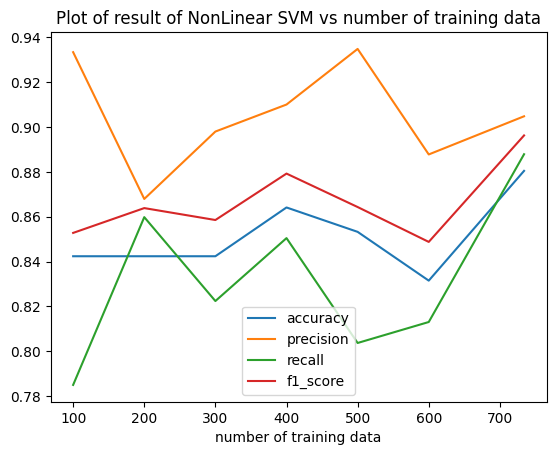

In [23]:
plt.plot(train_size,acc_scores)
plt.plot(train_size,prec_scores)
plt.plot(train_size,rec_scores)
plt.plot(train_size,f1_scores)



plt.title("Plot of result of NonLinear SVM vs number of training data")
plt.xlabel("number of training data")
plt.legend(["accuracy","precision","recall","f1_score"])
plt.show()


In [24]:
model_nonlinear_svm = SVC(kernel="sigmoid")



param_grid_nonlinear_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'degree': [1,2,3],
    'gamma': ['scale', 'auto'],  
    'max_iter': [100, 200, 300]  
}

grid_search_nonlinear_svm = GridSearchCV(model_nonlinear_svm, param_grid_nonlinear_svm, cv=10,verbose=2)
grid_search_nonlinear_svm.fit(xtrain, ytrain)



Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.1s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .......C=0.001, degree=3, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.001, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END ........C=0.01, degree=3, gamma=scale, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.1s
[CV] END .........C=0.01, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=0.1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=0.1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ...........C=1, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ............C=1, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=10, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END ..........C=10, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ...........C=10, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ...........C=10, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=100, degree=1, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=100; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=100, degree=1, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=100, degree=1, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=2, gamma=scale, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=100, degree=2, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=auto, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, deg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=100; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=200; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=scale, max_iter=300; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=100; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=200; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, degree=3, gamma=auto, max_iter=300; total time=   0.0s
[CV] END ..........C=100, de

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-

GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'max_iter': [100, 200, 300]},
             verbose=2)

In [25]:
best_params_nonlinear_svm = grid_search_nonlinear_svm.best_params_
best_model_nonlinear_svm = grid_search_nonlinear_svm.best_estimator_

accuracy_nonlinear_svm = best_model_nonlinear_svm.score(xtest, ytest)

print("Best Hyperparameters:", best_params_nonlinear_svm)
print("Accuracy:", accuracy_nonlinear_svm)


Best Hyperparameters: {'C': 10, 'degree': 1, 'gamma': 'auto', 'max_iter': 300}
Accuracy: 0.8586956521739131


KNN

In [26]:
acc_scores=[]
prec_scores=[]
rec_scores=[]
f1_scores=[]


for i in train_size:
  indices = np.random.choice(xtrain.shape[0], i)
  new_xtrain=xtrain[indices]
  new_ytrain=ytrain[indices]
  knn=KNeighborsClassifier(n_neighbors=5).fit(new_xtrain,new_ytrain)

  ypred=knn.predict(xtest)

  acc=accuracy_score(ytest,ypred)

  pres=precision_score(ytest,ypred)
  rec=recall_score(ytest,ypred)
  f1=f1_score(ytest,ypred)

  acc_scores.append(acc)
  prec_scores.append(pres)
  rec_scores.append(rec)
  f1_scores.append(f1)




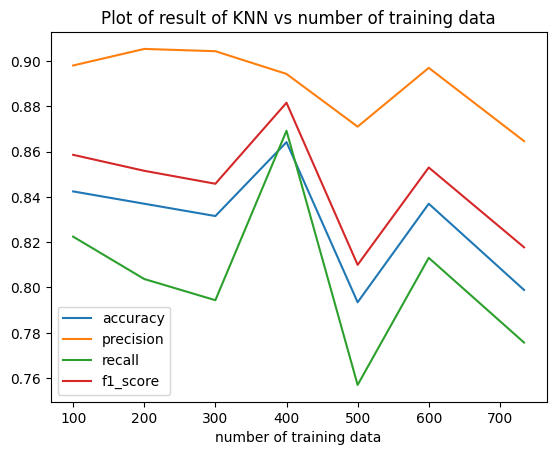

In [27]:
plt.plot(train_size,acc_scores)
plt.plot(train_size,prec_scores)
plt.plot(train_size,rec_scores)
plt.plot(train_size,f1_scores)



plt.title("Plot of result of KNN vs number of training data")
plt.xlabel("number of training data")
plt.legend(["accuracy","precision","recall","f1_score"])
plt.show()


In [28]:
knn = KNeighborsClassifier()



param_grid_knn = {
  'n_neighbors' : np.arange(2,20)
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10,verbose=2)
grid_search_knn.fit(xtrain, ytrain)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             verbose=2)

In [29]:
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

accuracy_knn = best_model_knn.score(xtest, ytest)

print("Best Hyperparameters:", best_params_knn)
print("Accuracy:", accuracy_knn)


Best Hyperparameters: {'n_neighbors': 11}
Accuracy: 0.842391304347826


In [30]:

train_size=100*np.arange(1,round(xtrain.shape[0]/100))
np.append(train_size,xtrain.shape[0])

array([100, 200, 300, 400, 500, 600, 734])